## Starting Computer Vision with OpenCV and Face detection

- Import libraries

In [1]:
import cv2
import matplotlib.pyplot as plt

- Reading the first image

In [2]:
image = cv2.imread('../resources/pics/px-girl.jpg')

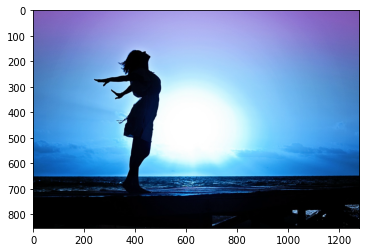

In [3]:
plt.imshow(image)

Because OpenCV opens the images in BGR format and PyPlot open it as RGB format, the colors are inverse.

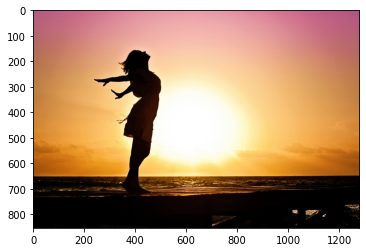

In [4]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)

Let's understand the image shape

In [5]:
image_rgb.shape

(853, 1280, 3)

The image size is width: 1280 pixels; height: 853 pixels and 3 color information: RGB

But for some image processing, the color is not important.

In [139]:
image_gray = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)

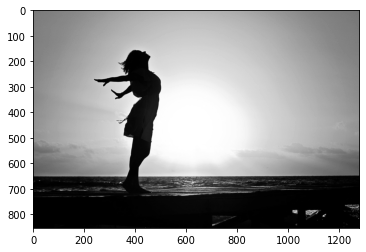

In [140]:
plt.imshow(image_gray, cmap='gray')

In [8]:
image_gray.shape

(853, 1280)

## Face Detection



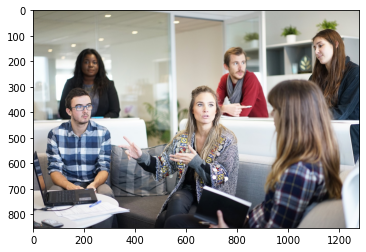

In [9]:
face_image = cv2.imread('../resources/pics/px-people.jpg')

## convert the GBR to RGB channels to correct display the image colors
face_image = cv2.cvtColor(face_image, cv2.COLOR_BGR2RGB)

plt.imshow(face_image)

In [10]:
face_image.shape

(853, 1280, 3)

the image has: 853 pixels width X 1280 pixels height X 3 color channel. But color is not important for Face detection.
Let's convert to gray scale


Image dimention:  (853, 1280)


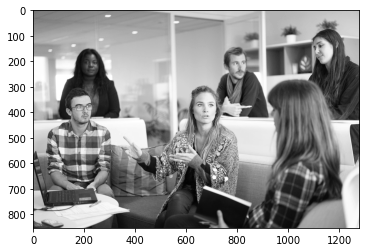

In [11]:
face_image_gray = cv2.cvtColor(face_image, cv2.COLOR_BGR2GRAY)
plt.imshow(face_image_gray, cmap='gray')
print('Image dimention: ', face_image_gray.shape)

In [12]:
type(face_image_gray)

numpy.ndarray

In [106]:
#-- Load the classifier
classifier = cv2.CascadeClassifier('../resources/classifiers/haarcascade_frontalface_default.xml')

In [107]:
#-- Detect faces
faces = classifier.detectMultiScale(face_image_gray, 1.3, 5)

In [108]:
faces[0]


array([1089,  103,   99,   99])

In [109]:
image_withFaces = face_image.copy()

In [110]:
for (x, y, w, h) in faces:
    cv2.rectangle(image_withFaces, (x,y), (x+w, y+h), (255, 255, 0), 4)

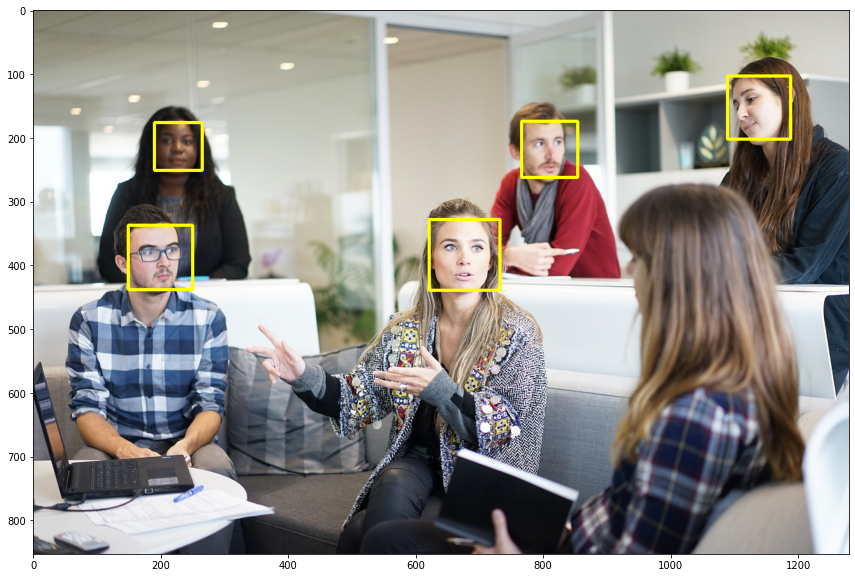

In [111]:
plt.figure(figsize=(15,10))
plt.imshow(image_withFaces)


In [20]:
## Save the detected face images in the HD

image_idx = 0

for (x,y,w,h) in faces:
    image_idx += 1
    image_roi = face_image[y:y+h, x:x+w]
    image_roi = cv2.cvtColor(image_roi, cv2.COLOR_RGB2BGR)
    cv2.imwrite('Aula1_face_' + str(image_idx) + '.png', image_roi)